# <center> TD4: Régression linéaire avec *scikit-learn* </center>


### 1) Utilisation de la classe *LinearRegression* sur le jeu de données précèdent

Nous allons maintenant utiliser la classe *LinearRegression* de *scikit-learn*. 
Nous allons générer le même jeu de données que précèdemment. 

- déterminer le modèle
- afficher la pente de la droite obtenue et l'ordonnée à l'origine
- afficher les résultats des calculs de l'erreur mse et rmse
- donner une représentation graphique du jeu de données ainsi que la droite de régression.

Pente :  [[4.93655106]]
Ordonnée à l'origine :  [10.55808002]
Racine carrée de l'erreur quadratique moyenne :  0.07623324582875003
Rmse :  0.27610368673516483
Sccore R2 :  0.9637291269612669


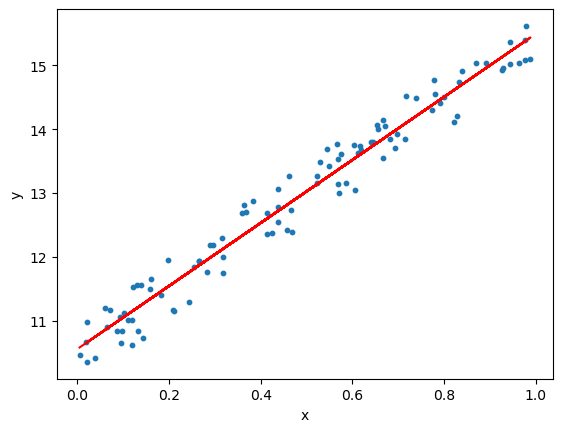

In [1]:
    import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Générer des données aléatoires
np.random.seed(0)
x = np.random.rand(100, 1)
y = 10 + 5 * x + np.random.rand(100, 1)
# Implémentation avec scikit-learn
# initialisation du modèle
regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
regression_model.fit(x, y)
# Prédiction
y_predicted = regression_model.predict(x)
# Évaluation du modèle
mse = mean_squared_error(y, y_predicted)
rmse = mean_squared_error(y, y_predicted, squared=False)
r2 = r2_score(y, y_predicted)
# Affichage des valeurs
print("Pente : " ,regression_model.coef_)
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", mse)
print("Rmse : ", rmse)
print('Sccore R2 : ', r2)
# Tracée des valeurs
# Points de données
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
# Valeurs prédites
plt.plot(x, y_predicted, color='r')
plt.show()

### 2) cas avec des caractéristiques multiples

Nous allons utiliser le jeu de données qui est dans *data/boston.txt*  
Ce jeu de données contient 506 échantillons et 12 variables caractéristiques. L’objectif est de prédire la valeur du prix des maisons (MEDV) en utilisant les variables caractéristiques.

Voici la description des données:

- CRIM : Taux de criminalité par habitant par ville.
- ZN : Proportion de zones de terrains résidentiels pour des lots de plus de 25 000 pieds carrés.
- INDUS : Proportion d’acres d’entreprises non commerciales par ville
- CHAS : Variable Dummy Charles River (= 1 si la parcelle borde la rivière ; 0 sinon)
- NOX : concentration d’oxyde nitrique (parties par 10 millions)
- RM : Nombre moyen de pièces par logement
- AGE : Proportion de logements occupés par leur propriétaire construits avant 1940
- DIS : Distances pondérées par rapport à cinq centres d’emploi de Boston
- RAD : Indice d’accessibilité aux autoroutes radiales
- TAX : Taux d’imposition foncière sur la pleine valeur par 10 000 $
- PTRATIO : ratio élèves/professeurs par ville
- ACC: ratio of accident
- LSTAT : Pourcentage de la population de statut inférieur
- MEDV : prix des maisons occupées par leur propriétaire, en milliers de dollars

- Commencer par charger les données (caractéristiques) dans un dataframe et visualiser les premières lignes pour tester que tout s'est bien passé. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

raw_df = pd.read_csv("data/boston.txt", sep="\s+", skiprows=22, header=None)
#print(raw_df)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','ACC','LSTAT']

boston = pd.DataFrame(data=data,columns=columns)
boston.head()
print(boston.shape)

(506, 13)


Il faut maintenant pré-traiter les données (pas de valeurs nulles dans les colonnes )

In [10]:
boston['MEDV'] = target

boston.isnull().sum()

print(boston.shape)

(506, 14)


Dans le cas des régressions linéaires multiples, deux conditions d’application sont nécessaires:  
- il doit y avoir une relation linéaire entre chaque variable caractéristique et la variable cible. 
- les variables caractéristiques doivent être indépendantes les unes des autres (il n’y a pas de colinéarité).

Nous allons construire la matrice de corrélation du jeu de donnéés qui nous montrera si des variables ont des relations de type linéaire avec la variable cible (coefficient proche de 1 ou -1). 



Pour cela utiliser, la méthode *corr()* de la classe *Dataframe*
- visualiser la matrice de corrélation obtenue (on pourra utiliser la méthode de la classe Dataframe *style.background_gradient(...)*)

In [15]:
correlation_matrice = boston.corr().round(2)
#plt.matshow(correlation_matrice)
correlation_matrice.style.background_gradient(cmap='coolwarm')
#sns.heatmap(data=correlation_matrix, annot=True);

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,ACC,LSTAT,MEDV
CRIM,1.000000,-0.200000,0.410000,-0.060000,0.420000,-0.220000,0.350000,-0.380000,0.630000,0.580000,0.290000,-0.390000,0.460000,-0.390000
ZN,-0.200000,1.000000,-0.530000,-0.040000,-0.520000,0.310000,-0.570000,0.660000,-0.310000,-0.310000,-0.390000,0.180000,-0.410000,0.360000
INDUS,0.410000,-0.530000,1.000000,0.060000,0.760000,-0.390000,0.640000,-0.710000,0.600000,0.720000,0.380000,-0.360000,0.600000,-0.480000
CHAS,-0.060000,-0.040000,0.060000,1.000000,0.090000,0.090000,0.090000,-0.100000,-0.010000,-0.040000,-0.120000,0.050000,-0.050000,0.180000
NOX,0.420000,-0.520000,0.760000,0.090000,1.000000,-0.300000,0.730000,-0.770000,0.610000,0.670000,0.190000,-0.380000,0.590000,-0.430000
RM,-0.220000,0.310000,-0.390000,0.090000,-0.300000,1.000000,-0.240000,0.210000,-0.210000,-0.290000,-0.360000,0.130000,-0.610000,0.700000
AGE,0.350000,-0.570000,0.640000,0.090000,0.730000,-0.240000,1.000000,-0.750000,0.460000,0.510000,0.260000,-0.270000,0.600000,-0.380000
DIS,-0.380000,0.660000,-0.710000,-0.100000,-0.770000,0.210000,-0.750000,1.000000,-0.490000,-0.530000,-0.230000,0.290000,-0.500000,0.250000
RAD,0.630000,-0.310000,0.600000,-0.010000,0.610000,-0.210000,0.460000,-0.490000,1.000000,0.910000,0.460000,-0.440000,0.490000,-0.380000
TAX,0.580000,-0.310000,0.720000,-0.040000,0.670000,-0.290000,0.510000,-0.530000,0.910000,1.000000,0.460000,-0.440000,0.540000,-0.470000


- Rechercher les variables qui sont les plus corrélées linéairement avec le prix (MEDV)
- pour chacune de ces variables représenter graphiquement le prix en fonction d'une variable choisie. Que constatez vous ?


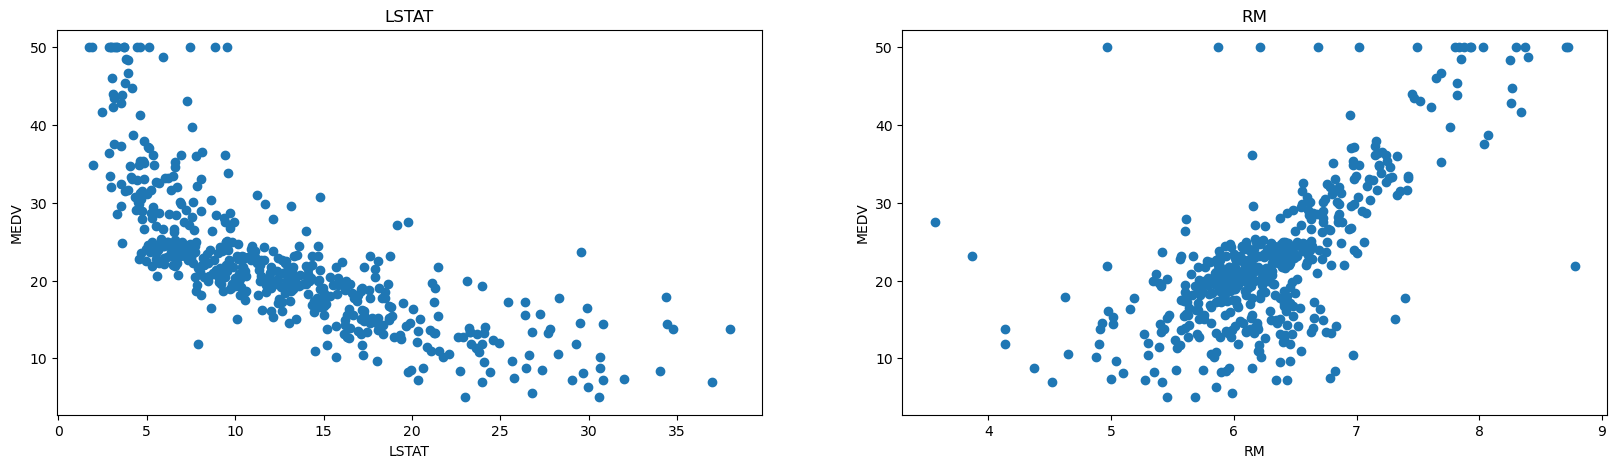

In [11]:
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = boston['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Mettre en place la régression linéaire qui prend en compte les variables précédentes.  
Vous allez d'abord séparer le jeu de données en 80% d'apprentissage et 20% de test

In [12]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)


- réaliser l'apprentissage de la droite de régression sur l'ensemble d'apprentissage et réaliser une prédiction sur ce même ensemble d'apprentissage.
- regarder en quoi consiste les mesures nommées, **coefficient de détermination: r_squared(r2)**, **l'erreur quadratique moyenne (MSE)**, **racine de l'erreur quadratique (RMSE)**
- utiliser **rmse** et **r-squared** pour déterminer les performances du modèle sur les données d'apprentissage

In [13]:

from sklearn.metrics import mean_squared_error, r2_score
# évaluation du modèle pour l'ensemble d'entraînement

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur MSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")


La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur MSE est 5.512880843371696
le score R2 est 0.6501592679428922




Réaliser la prédiction sur l'ensemble de test et afficher les scores *rmse* et *r_squared(r2)*

In [14]:
# évaluation du modèle pour le set de tesst
y_test_predict = linear_model.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(Y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 5.589569804715174
le score R2 score est 0.5739577415025858
